Prices prediction

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import csv


In [144]:
## load Csv 
with open('insurance.csv', 'r') as csvfile:
  # Create a reader object
  csv_reader = csv.reader(csvfile)
  y_train = [] # result of insurance cost
  x_train = [] # features age
  x_trains = []
  for idx, row in enumerate(csv_reader):
    # Access each element in the row
    if idx != 0:
     y_train.append(round(float(row[6]),1))
     x_train.append(row[2])
     smoking  = (1, 0) [row[4] == "yes"]
     bmiBad = (0, float(row[2])) [float(row[2]) > 30] 
     age = float(row[0])
     x_trains.append([age, bmiBad, smoking])
    else:
     print(row)
    if idx == 500:
      break
  print(f"y_train {y_train}")
  print(f"x_train{x_train}")
  print(f"x_trains{x_trains}")

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
y_train [16884.9, 1725.6, 4449.5, 21984.5, 3866.9, 3756.6, 8240.6, 7281.5, 6406.4, 28923.1, 2721.3, 27808.7, 1826.8, 11090.7, 39611.8, 1837.2, 10797.3, 2395.2, 10602.4, 36837.5, 13228.8, 4149.7, 1137.0, 37701.9, 6203.9, 14001.1, 14451.8, 12268.6, 2775.2, 38711.0, 35585.6, 2198.2, 4687.8, 13770.1, 51194.6, 1625.4, 15612.2, 2302.3, 39774.3, 48173.4, 3046.1, 4949.8, 6272.5, 6313.8, 6079.7, 20630.3, 3393.4, 3556.9, 12629.9, 38709.2, 2211.1, 3579.8, 23568.3, 37742.6, 8059.7, 47496.5, 13607.4, 34303.2, 23244.8, 5989.5, 8606.2, 4504.7, 30166.6, 4133.6, 14711.7, 1743.2, 14235.1, 6389.4, 5920.1, 17663.1, 16577.8, 6799.5, 11741.7, 11946.6, 7726.9, 11356.7, 3947.4, 1532.5, 2755.0, 6571.0, 4441.2, 7935.3, 37165.2, 11033.7, 39836.5, 21098.6, 43578.9, 11073.2, 8026.7, 11082.6, 2027.0, 10942.1, 30184.9, 5729.0, 47291.1, 3766.9, 12105.3, 10226.3, 22412.6, 15820.7, 6186.1, 3645.1, 21344.8, 30942.2, 5003.9, 17560.4, 2331.5, 3877.3, 2867.1,

Plot the data age and cost


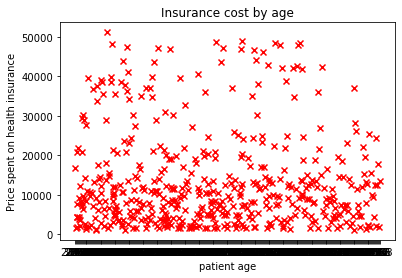

In [145]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Insurance cost by age")
# Set the y-axis label
plt.ylabel('Price spent on health insurance')
# Set the x-axis label
plt.xlabel('patient age')
plt.show()

f(w,b)= wx+w1x1 + w2x2 + <...> + b

In [129]:
w_coef = np.array([800, 500, 500])

def compute_cost(X, y, w):
  """
  compute cost
  Args:
    X (ndarray (m,n)): Data, m examples with n features
    y (ndarray (m,)) : target values
    w (ndarray (n,)) : model parameters  
    b (scalar)       : model parameter
    
  Returns:
    cost (scalar): cost
  """
  m = X.shape[0]
  cost = 0.0
  for i in range(m):                                
      f_wb_i = np.dot(X[i], w)           #(n,)(n,) = scalar (see np.dot)
      cost = cost + (f_wb_i - y[i])**2       #scalar
  cost = cost / (2 * m)                      #scalar    
  return cost

xtrains = np.array(x_trains)
ytrains = np.array(y_train)
testetW =  np.array([24603929.98310912, 14019682.90906502,  462086.83744395])
cost = compute_cost(np.array(x_trains), np.array(y_train), testetW)
print(f"costValue {cost} xshape {xtrains.shape} {w_coef.shape} ytrains {ytrains.shape}")

costValue 8.500273126958271e+17 xshape (1338, 3) (3,) ytrains (1338,)


In [124]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        # dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [143]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(xtrains, ytrains, np.array([100,500,1000]), 0)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')
cost = compute_cost(np.array(x_trains), np.array(y_train), tmp_dj_dw)
print(f"costValue {cost} xshape {xtrains.shape} {w_coef.shape} ytrains {ytrains.shape}")

dj_db at initial w,b: 0.0
dj_dw at initial w,b: 
 [  9504.53467862 131016.06655755   4602.28026906]
costValue 6685135904060.428 xshape (1338, 3) (3,) ytrains (1338,)
